In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy
!pip3 install openpyxl

In [168]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [169]:
data = pd.read_excel("knysh.xlsx")
data = data[data.year == 2018]
data

,Country,year,number,points,male,group,lang,age,voting,win,nghb,dev,host,age25,semifinal,final_auto
232,Albania,2018,12,184,1,0,1,34,1,0,0,0,0,0,162,0
233,Australia,2018,16,99,0,0,0,29,1,0,0,1,0,0,212,0
234,Austria,2018,5,342,1,0,0,35,1,1,0,1,0,0,231,0
235,Bulgaria,2018,18,166,1,1,0,33,1,0,0,0,0,0,177,0
236,Cyprus,2018,25,436,0,0,0,31,1,0,0,1,0,0,262,0
237,Czech Republic,2018,14,281,1,0,0,23,1,0,0,1,0,1,232,0
238,Denmark,2018,15,226,1,0,0,33,1,1,0,1,0,0,204,0
239,Estonia,2018,6,245,0,0,1,27,1,1,0,1,0,0,201,0
240,Finland,2018,17,46,0,0,0,31,1,1,0,1,0,0,108,0
241,France,2018,13,173,1,1,1,32,1,1,0,1,0,0,0,1


## График плотности

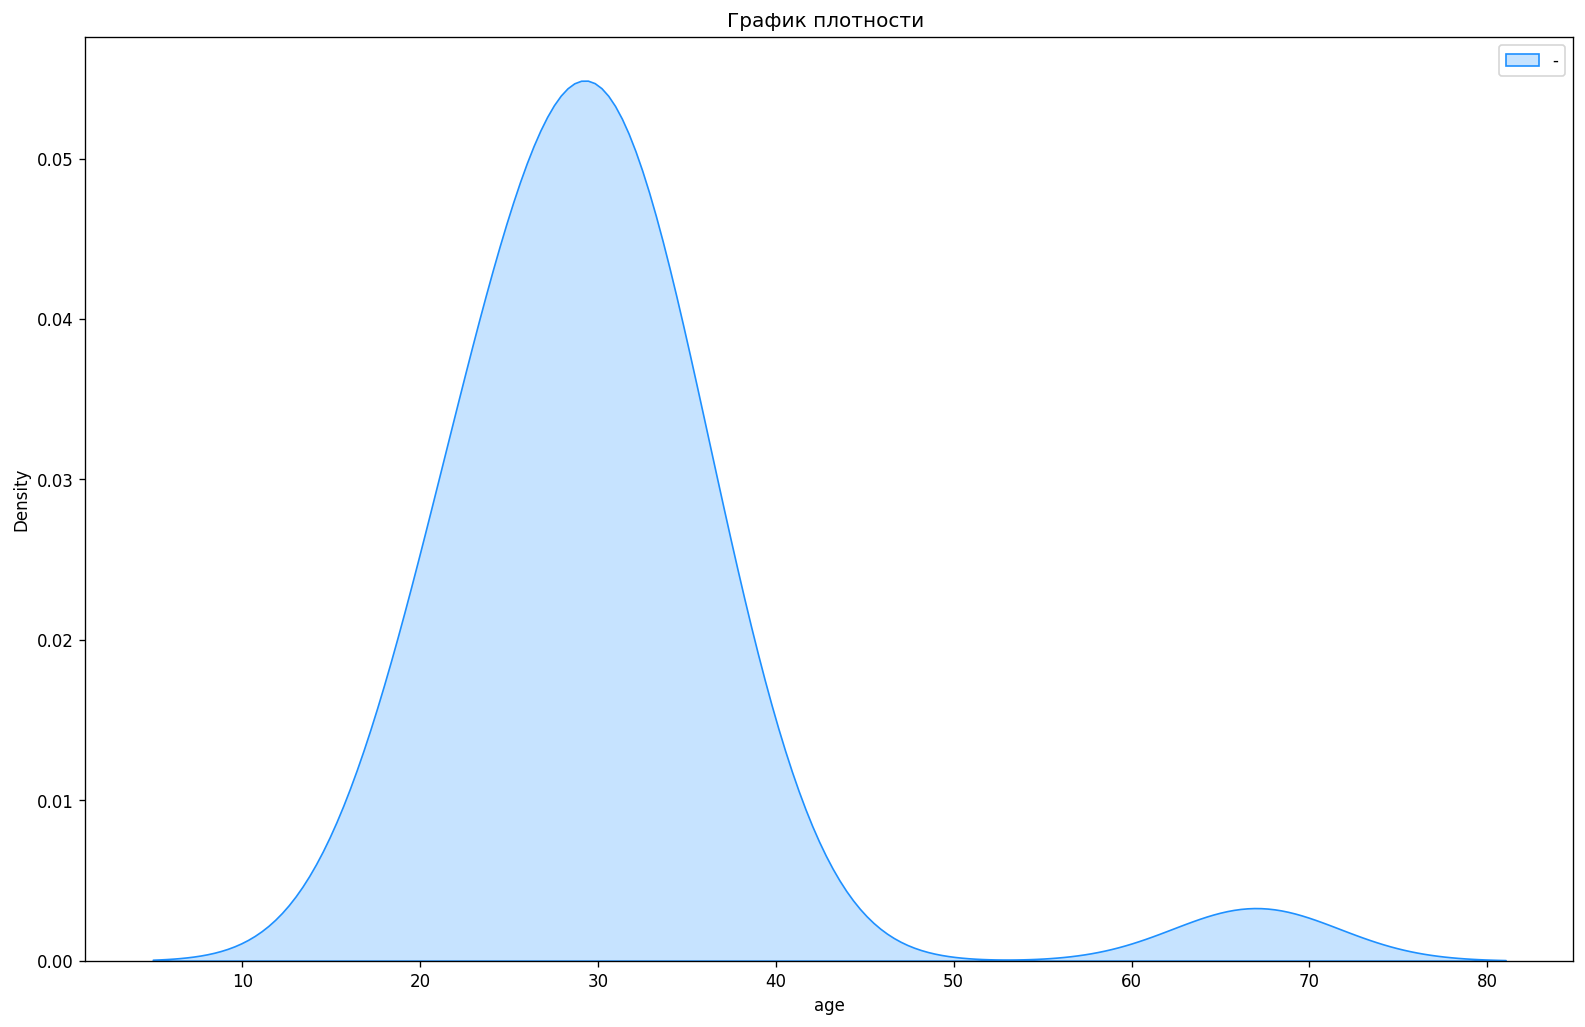

In [170]:
plt.figure(figsize=(16, 10), dpi=120)
plt.title("График плотности ")
sns.kdeplot(data.age, fill=True, color="dodgerblue", label="-")
plt.legend()
plt.show()

## Тест Колмагорова-Смирнова

In [171]:
if sts.kstest(data.age, 'norm').pvalue > 0.05:
    print(True)
else:
    print(False)

False


## Тест Шапиро-Уилка

In [172]:
if sts.shapiro(data.age).pvalue > 0.05:
    print(True)
else:
    print(False)

False


## Тест Харке-Бера

In [173]:
if sts.jarque_bera(data.age).pvalue > 0.05:
    print(True)
else:
    print(False)

False


## По результатам тестов мы можем отвергнуть гипотезу 8

# Гипотеза 6

In [174]:
average = np.average(data.age)
median = np.median(data.age)
print("Median " + str(median))
print("Average " + str(average))

Median 29.0
Average 30.23076923076923


## ХЗХЗХ - один год значим?

# Гипотеза 9

In [175]:
corr = np.corrcoef(data.index, data.age)
sts.pearsonr(data.index, data.points)

PearsonRResult(statistic=-0.3538854230423417, pvalue=0.07612485219119347)

## Поскольку pvalue больше 0.05 мы не можем отклонить гипотезу

In [176]:
data_male = data[data.male == 1]
data_female = data[data.male == 0]
average_male = np.average(data_male.age)
average_female = np.average(data_female.age)
print(average_female)
print(average_male)

27.666666666666668
31.58823529411765


## Что такое нормальное приближение???